<a href="https://www.kaggle.com/code/pachecopacheco4/deep-learning-titanic?scriptVersionId=149018064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 This is my baby first "deep learning" project. It has no complexity at all; it is a basic neural network that tries to predict titanic survival. I know there is room for improvement but I must start somewhere :)

In [1]:
import pandas as pd 
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have seen the most important variables in past study (see it here https://www.kaggle.com/code/pachecopacheco4/survival-titanic) to predict survival. For this reason, we ommit this step and we pass directly to imputation and data preprocessing. 

In [2]:
from sklearn.impute import SimpleImputer
features = ['Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']
X = titanic[features]
y = titanic.Survived
X.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,male,1,0,7.2500,S,22.0
1,1,female,1,0,71.2833,C,38.0
2,3,female,0,0,7.9250,S,26.0
3,1,female,1,0,53.1000,S,35.0
4,3,male,0,0,8.0500,S,35.0


In [3]:
X2 = X.copy()
my_imputer = SimpleImputer()
numerical_cols2 = [cname for cname in X2.columns if X2[cname].dtype in ['int64', 'float64']]

X2[numerical_cols2] = pd.DataFrame(my_imputer.fit_transform(X2[numerical_cols2]))
X2[numerical_cols2].columns = X[numerical_cols2].columns

print(X[numerical_cols2].isnull().sum())
print(X2[numerical_cols2].isnull().sum())

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
categorical_cols2 = [cname for cname in X2.columns if X2[cname].dtype == "object"]
#### !!!! This is important; we must imputate first before oneHotEncoding
print(X2[categorical_cols2].isnull().sum())
my_imputer = SimpleImputer(strategy='most_frequent')
X2[categorical_cols2] = pd.DataFrame(my_imputer.fit_transform(X2[categorical_cols2]))
X2[categorical_cols2].columns = X[categorical_cols2].columns
print(X2[categorical_cols2].isnull().sum())

# Create a OneHotEncoder instance
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply one-hot encoding to the selected columns and store in a new DataFrame
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X2[categorical_cols2]))

OH_cols

# One-hot encoding removes the index. Add it back to the encoded DataFrame
OH_cols.index = X2.index
OH_cols
# Remove the original categorical columns from X2
X2.drop(categorical_cols2, axis=1, inplace=True)
#print('BEFORE\n',X2.head())
# Concatenate the one-hot encoded columns with the numerical columns in X2
X2 = pd.concat([X2, OH_cols], axis=1)
print('AFTER\n')
X2.head()
#### !!!! important to use this dataframe after in models 
X2.columns = X2.columns.astype(str)
X2.head()

Pclass      0
SibSp       0
Parch       0
Fare        0
Age       177
dtype: int64
Pclass    0
SibSp     0
Parch     0
Fare      0
Age       0
dtype: int64
Sex         0
Embarked    2
dtype: int64
Sex         0
Embarked    0
dtype: int64
AFTER



,Pclass,SibSp,Parch,Fare,Age,0,1,2,3,4
0,3.0,1.0,0.0,7.2500,22.0,0.0,1.0,0.0,0.0,1.0
1,1.0,1.0,0.0,71.2833,38.0,1.0,0.0,1.0,0.0,0.0
2,3.0,0.0,0.0,7.9250,26.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,53.1000,35.0,1.0,0.0,0.0,0.0,1.0
4,3.0,0.0,0.0,8.0500,35.0,0.0,1.0,0.0,0.0,1.0


In [4]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X2, y, random_state = 35643419)
input_shape = [train_X.shape[1]]

 **COMMENT**: initially we had not BatchNormalization; when we added it, we got an improvement.  

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Best Validation Loss: 0.4134
Best Validation Accuracy: 0.8161


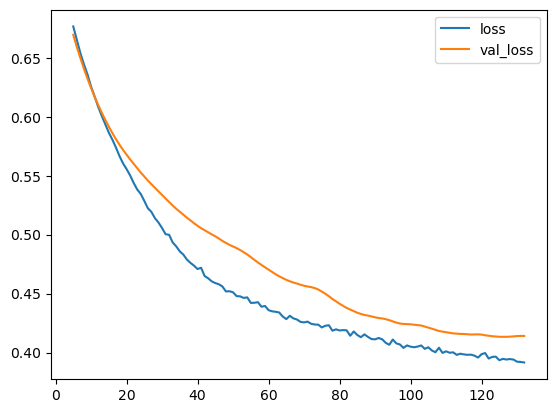

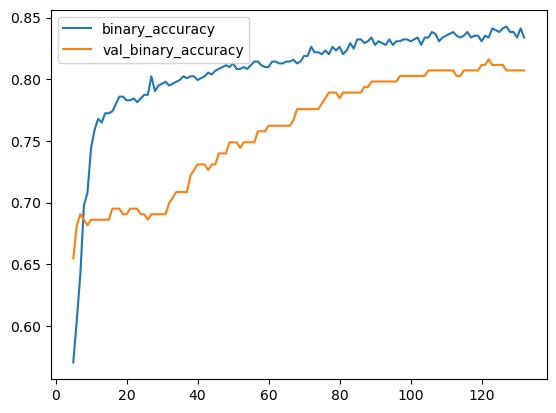

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Set seeds for reproducibility
seed_value = 35643419
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', input_shape=input_shape),
    #layers.Dropout(rate=0.1),
    layers.Dense(16, activation='relu'),
    #layers.Dropout(rate=0.1),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [6]:
predictions = model.predict(val_X)
from sklearn.metrics import accuracy_score

binary_predictions = np.round(predictions)
score = accuracy_score(val_y, binary_predictions)
score

7/7 [==============================] - 0s 2ms/step


0.8161434977578476